---
title: "Mock Viz Kang"
subtitle: "A DSAN 5200 Project"
author: "Kangheng Liu"
date: last-modified
date-format: long
format:
    html:
        theme:
            dark: 
                - cosmo
                - style/html-sta313.scss
                - style/html-dark.scss
                - style/my-adjustments.scss
            light: 
                - cosmo
                - style/html-sta313.scss
        toc: true
        code-copy: true
        code-overflow: wrap
        mainfont: "Atkinson Hyperlegible"
        code-annotations: hover
        self-contained: true
execute:
    echo: true
    warning: false
    message: false
    freeze: auto
filters:
    - openlinksinnewpage
lightbox: auto
---

In [425]:
# import revelent libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [426]:
# Read in data from ./data directory

box_office = pd.read_csv('../data/clean_data/box_office_data.csv')
cast_and_crew1 = pd.read_csv('../data/clean_data/cast_and_crew1.csv')
cast_and_crew2 = pd.read_csv('../data/clean_data/cast_and_crew2.csv')
filming_locations = pd.read_csv('../data/clean_data/filming_locations.csv')
genre_sentiment = pd.read_csv('../data/clean_data/genre_sentiment.csv')
movie_level_data_with_sentiment = pd.read_csv('../data/clean_data/movie_level_data_with_sentiment.csv')
movie_level_data = pd.read_csv('../data/clean_data/movie_level_data.csv')


In [427]:
# what does the data look like?
print(box_office.head())


                                Title  Year  Worldwide_Box_Office  \
0  Star Wars: Episode IV - A New Hope  1977           307263857.0   
1               Smokey and the Bandit  1977           126747995.0   
2  Close Encounters of the Third Kind  1977           116395460.0   
3                Saturday Night Fever  1977            94213184.0   
4                    A Bridge Too Far  1977            50750000.0   

   WBO_Adjusted_for_Inflation  
0                5.928476e+09  
1                2.445528e+09  
2                2.245782e+09  
3                1.817788e+09  
4                9.791914e+08  


In [428]:
print(cast_and_crew1.head())


      tconst  ordering     nconst  category       job      characters  \
0  tt0000005         1  nm0443482     actor        \N  ["Blacksmith"]   
1  tt0000005         2  nm0653042     actor        \N   ["Assistant"]   
2  tt0000005         3  nm0249379  producer  producer              \N   
3  tt0001223         7  nm0249379  producer  producer              \N   
4  tt0000010         1  nm0525910  director        \N              \N   

  titleType  numVotes  averageRating       primaryName birthYear deathYear  \
0     short      2757            6.2    Charles Kayser      1878      1966   
1     short      2757            6.2          John Ott      1850      1931   
2     short      2757            6.2  Thomas A. Edison      1847      1931   
3     short      4716            6.4  Thomas A. Edison      1847      1931   
4     short      7530            6.8     Louis Lumière      1864      1948   

                             primaryProfession  \
0                                    ['act

In [429]:
print(cast_and_crew2.head())


      tconst  ordering     nconst  category       job characters titleType  \
0  tt1186830        16  nm0547050  composer        \N         \N     movie   
1  tt1229822        16  nm0547050  composer        \N         \N     movie   
2  tt1441951        15  nm0547050  composer  composer         \N     movie   
3  tt1441952        15  nm0547050  composer        \N         \N     movie   
4  tt1781769        17  nm0547050  composer        \N         \N     movie   

   numVotes  averageRating       primaryName birthYear deathYear  \
0     72970            7.1  Dario Marianelli      1963        \N   
1     92903            7.3  Dario Marianelli      1963        \N   
2     21174            6.8  Dario Marianelli      1963        \N   
3     67064            6.8  Dario Marianelli      1963        \N   
4    106345            6.6  Dario Marianelli      1963        \N   

                                primaryProfession  \
0  ['composer', 'music_department', 'soundtrack']   
1  ['composer', 

In [430]:
print(filming_locations.head())


      tconst                                         location_1  \
0  tt0111161  Mansfield Reformatory - 100 Reformatory Road, ...   
1  tt0468569                             Chicago, Illinois, USA   
2  tt1375666  Fortress Mountain, Kananaskis Country, Alberta...   
3  tt0137523  240 North Neptune Avenue, Los Angeles, Califor...   
4  tt0944947              Split, Split-Dalmatia County, Croatia   

                                          location_2  \
0                                  Butler, Ohio, USA   
1  Battersea Power Station, Battersea, London, En...   
2                                   Tangier, Morocco   
3  217 Figueroa Street, Los Angeles, California, USA   
4                            Vrsno, Sibenik, Croatia   

                                          location_3  \
0        Sandy Point, St. Croix, U.S. Virgin Islands   
1              Times Square, Causeway Bay, Hong Kong   
2                                    Shizuoka, Japan   
3  Promenade Towers Apartments - 123

In [431]:
print(genre_sentiment.head())


    Category    Values
0  Biography  0.038096
1  Biography -0.027905
2  Biography  0.044076
3  Biography  0.036501
4  Biography  0.094158


In [432]:
print(movie_level_data_with_sentiment.head())


                File Name                                            Content  \
0                   Gamer  \n\n\n                              GAMER\n\n\...   
1  No Country for Old Men  \n\n\n \n                          NO COUNTRY ...   
2             Bad Country  \n\n \n                                  BAD C...   
3                17 Again  \n           \n          \n                   ...   
4          Color of Night  \n\n\n                                    COLO...   

   script_len  polarity  index     tconst titleType            primaryTitle  \
0      230180  0.004451   1952  tt1034032     movie                   Gamer   
1      189510  0.013795     71  tt0477348     movie  No Country for Old Men   
2      217197 -0.019347  15659  tt2350892     movie             Bad Country   
3      200101  0.062805   1196  tt0974661     movie                17 Again   
4      255873  0.121270   7789  tt0109456     movie          Color of Night   

            originalTitle  isAdult  ...  arc

In [433]:
print(movie_level_data.head())


      tconst titleType              primaryTitle             originalTitle  \
0  tt0111161     movie  The Shawshank Redemption  The Shawshank Redemption   
1  tt0468569     movie           The Dark Knight           The Dark Knight   
2  tt1375666     movie                 Inception                 Inception   
3  tt0137523     movie                Fight Club                Fight Club   
4  tt0944947  tvSeries           Game of Thrones           Game of Thrones   

   isAdult  startYear endYear runtimeMinutes                   genres  \
0        0       1994      \N            142                    Drama   
1        0       2008      \N            152       Action,Crime,Drama   
2        0       2010      \N            148  Action,Adventure,Sci-Fi   
3        0       1999      \N            139                    Drama   
4        0       2011    2019             60   Action,Adventure,Drama   

   averageRating  ...  archive_sound  casting_director  cinematographer  \
0            9.3 

In [434]:
# Value counts for genre_sentiment dataframe
print(genre_sentiment['Category'].value_counts())

Category
Drama          309
Comedy         149
Crime           84
Action          84
Romance         83
Thriller        72
Adventure       67
Mystery         58
Biography       53
Horror          38
Sci-Fi          38
Fantasy         23
Animation       22
History         19
War             18
Music           17
Family          15
Western          7
Sport            6
Musical          3
Documentary      2
Film-Noir        1
Talk-Show        1
Short            1
Name: count, dtype: int64


<Axes: xlabel='Category'>

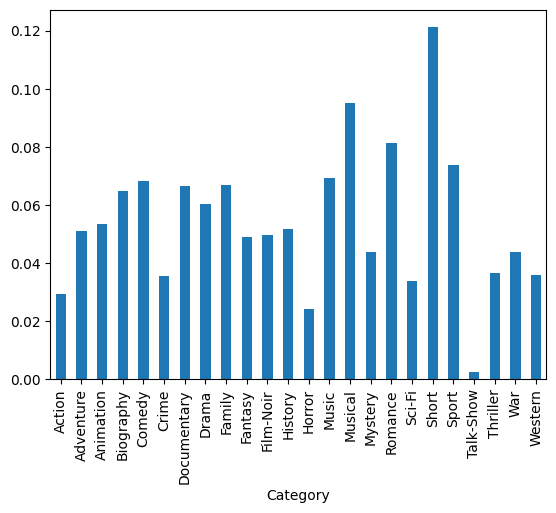

In [435]:
# Visualizing genre_sentiment dataframe that groups by Category column and calculates the mean of the Values column and plots the result in a bar chart
genre_sentiment.groupby('Category')['Values'].mean().plot(kind='bar')

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_68095/3909163342.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  box_office.groupby(pd.cut(box_office['Year'], bins=8))['Worldwide_Box_Office'].mean().plot(kind='line')


Text(6, 2700000000.0, 'Avatar')

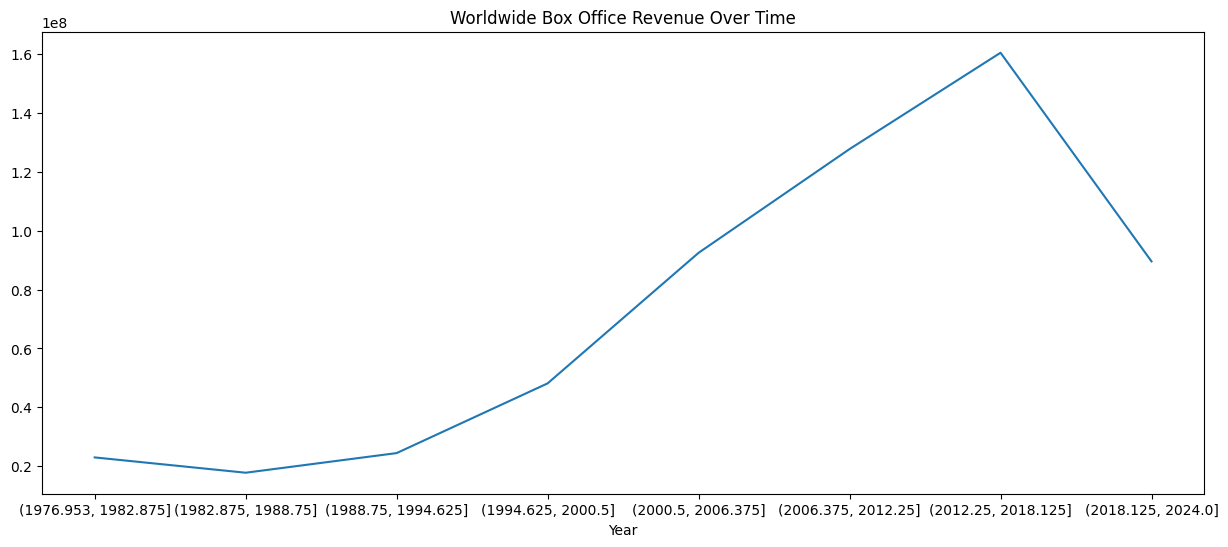

In [436]:
# Visualizing the box_office dataframe that bins the data into appropriate bins by "Year" column and calculates the mean of the "Worldwide_Box_Office" column and plots the result in a line chart

plt.figure(figsize=(15, 6))

box_office.groupby(pd.cut(box_office['Year'], bins=8))['Worldwide_Box_Office'].mean().plot(kind='line')

plt.title('Worldwide Box Office Revenue Over Time')

# Annotate the highest revenue year with the "Title" of the movie
plt.annotate('Avatar', xy=(6, 2.7e9), xytext=(6, 2.7e9), arrowprops=dict(facecolor='black', shrink=0.05))

<Axes: xlabel='Year'>

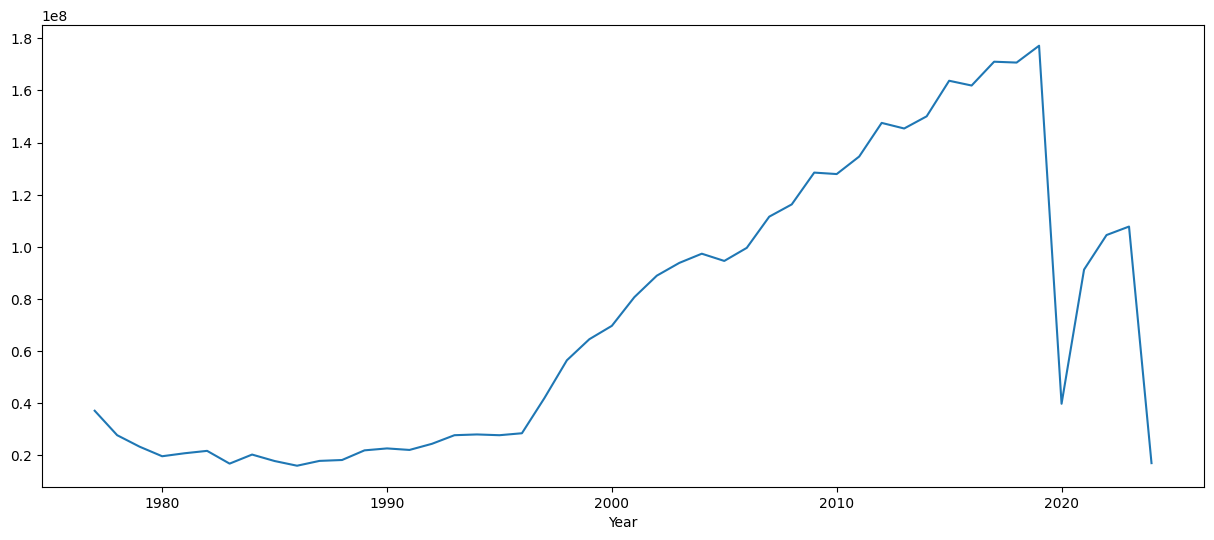

In [437]:
# Visualizing the box_office dataframe by "Year" column vs "Worldwide_Box_Office" column and plots the result in a line chart
plt.figure(figsize=(15, 6))

box_office.groupby('Year')['Worldwide_Box_Office'].mean().plot(kind='line')

In [438]:
# Since the actual data isn't available, I will create fake data based on the provided image and typical movie data structure.
import pandas as pd
# Fake data for financial_info.csv
financial_info_data = pd.read_csv('../data/clean_data/financial_info.csv')

# Fake data for movie_level_data.csv
movie_level_data_data = pd.read_csv('../data/clean_data/movie_level_data.csv')

# Convert the fake data to DataFrames
financial_info_df = pd.DataFrame(financial_info_data)
movie_level_data_df = pd.DataFrame(movie_level_data_data)

# Perform the merge, keeping only 'box_office' from the first and 'genres' from the second
# Then, we drop any rows that don't have 'genres'
merged_df = financial_info_df[['tconst', 'box_office']].merge(
    movie_level_data_df[['tconst', 'genres', 'startYear']],
    on='tconst'
)

# Drop rows without genres
merged_df = merged_df.dropna(subset=['genres'])
merged_df.drop(columns=['tconst'], inplace=True)
# Export the merged DataFrame to JSON
merged_json = merged_df.to_json(orient='records')

# Display the merged DataFrame and the JSON string
merged_df, merged_json

# Save the JSON string to a file
with open('../data/json_data/merged_data.json', 'w') as f:
    f.write(merged_json)


In [439]:
merged_df

,box_office,genres,startYear
0,2.890662e+07,Drama,1994
1,1.008487e+09,"Action,Crime,Drama",2008
2,8.390306e+08,"Action,Adventure,Sci-Fi",2010
3,1.013201e+08,Drama,1999
4,6.782265e+08,"Drama,Romance",1994
...,...,...,...
2161,1.469369e+08,"Action,Adventure,Fantasy",2015
2162,1.775120e+08,"Horror,Mystery",2010
2163,2.285063e+06,"Crime,Drama,Film-Noir",1958
2164,8.723816e+07,"Adventure,Comedy,Fantasy",2007


In [440]:
# Split the 'genres' column into a list of genres
merged_df['genres'] = merged_df['genres'].str.split(',')

# Explode the 'genres' list into separate rows
df_long = merged_df.explode('genres')


In [441]:
df_long

,box_office,genres,startYear
0,2.890662e+07,Drama,1994
1,1.008487e+09,Action,2008
1,1.008487e+09,Crime,2008
1,1.008487e+09,Drama,2008
2,8.390306e+08,Action,2010
...,...,...,...
2164,8.723816e+07,Adventure,2007
2164,8.723816e+07,Comedy,2007
2164,8.723816e+07,Fantasy,2007
2165,1.361517e+08,Horror,2010


In [442]:
import pandas as pd
import json

# Assuming df_long is your DataFrame

# Define the genres of interest
genres_list = [
    'Action', 'Adventure', 'Comedy', 'Crime', 'Drama',
    'Fantasy', 'Horror', 'Mystery', 'Romance', 'Thriller'
]

# Filter the DataFrame for the specified genres
df_filtered = df_long[df_long['genres'].isin(genres_list)]

# Group by 'startYear' and 'genres', then sum 'box_office'
grouped = df_filtered.groupby(['startYear', 'genres'])['box_office'].sum().unstack(fill_value=0)

# Convert to a list of dictionaries with 'year' as one of the keys
list_of_dicts = [
    {'year': year, **row.to_dict()}
    for year, row in grouped.iterrows()
]

# Each dictionary in the list now represents a year and contains 11 pairs: 'year' and the sum for each genre


In [443]:
list_of_dicts

[{'year': 1921,
  'Action': 0.0,
  'Adventure': 0.0,
  'Comedy': 41979.0,
  'Crime': 0.0,
  'Drama': 41979.0,
  'Fantasy': 0.0,
  'Horror': 0.0,
  'Mystery': 0.0,
  'Romance': 0.0,
  'Thriller': 0.0},
 {'year': 1925,
  'Action': 0.0,
  'Adventure': 31490.0,
  'Comedy': 31490.0,
  'Crime': 0.0,
  'Drama': 31490.0,
  'Fantasy': 0.0,
  'Horror': 0.0,
  'Mystery': 0.0,
  'Romance': 0.0,
  'Thriller': 0.0},
 {'year': 1927,
  'Action': 0.0,
  'Adventure': 0.0,
  'Comedy': 0.0,
  'Crime': 0.0,
  'Drama': 1349711.0,
  'Fantasy': 0.0,
  'Horror': 0.0,
  'Mystery': 0.0,
  'Romance': 0.0,
  'Thriller': 0.0},
 {'year': 1931,
  'Action': 0.0,
  'Adventure': 0.0,
  'Comedy': 50419.0,
  'Crime': 35566.0,
  'Drama': 50419.0,
  'Fantasy': 0.0,
  'Horror': 0.0,
  'Mystery': 35566.0,
  'Romance': 50419.0,
  'Thriller': 35566.0},
 {'year': 1934,
  'Action': 0.0,
  'Adventure': 0.0,
  'Comedy': 14729.0,
  'Crime': 0.0,
  'Drama': 0.0,
  'Fantasy': 0.0,
  'Horror': 0.0,
  'Mystery': 0.0,
  'Romance': 14729.

In [444]:
import json
import os

# Assuming 'list_of_dicts' is your list of dictionaries
# Create the directory if it doesn't exist
json_data_dir = "../data/json_data"
os.makedirs(json_data_dir, exist_ok=True)

# File path for the JSON output
json_file_path = os.path.join(json_data_dir, "genre_data.json")

# Convert the list of dictionaries to JSON
json_output = json.dumps(list_of_dicts, indent=4)  # Use indent=4 for pretty printing

# Write the JSON data to the file
with open(json_file_path, 'w') as file:
    file.write(json_output)

# Print the file path for confirmation
print("JSON file has been saved to:", json_file_path)


JSON file has been saved to: ../data/json_data/genre_data.json
